In [1]:
#!/usr/bin/env python3 

In [73]:
# Importing the necessary packages 
import numpy as np 
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [74]:
# Reading the dataset into memory 
dataset = pd.read_excel('dope.xlsx',  error_bad_lines=False)
dataset = dataset.fillna(0)

# viewing the dataset 
dataset.head() 

,Div,Date,HomeTeam,AwayTeam,GBH,GBD,GBA,FTR,FTHG,FTAG,Attendance,WHH,WHD,WHA
0,D1,11/08/00,Dortmund,Hansa Rostock,1.5,3.4,5.0,H,1,0,61000.0,1.44,3.6,6.5
1,D1,12/08/00,Bayern Munich,Hertha,1.3,4.5,6.0,H,4,1,57000.0,1.44,3.6,6.5
2,D1,12/08/00,Freiburg,Stuttgart,2.4,3.1,2.5,H,4,0,22500.0,2.40,3.2,2.5
3,D1,12/08/00,Hamburg,Munich 1860,1.8,3.3,3.8,D,2,2,35000.0,1.66,3.3,4.5
4,D1,12/08/00,Kaiserslautern,Bochum,1.5,3.4,4.6,A,0,1,38000.0,1.50,3.6,5.5


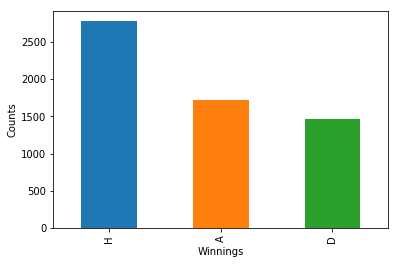

In [75]:
# Plotting a graph of the total counts for the Potential winnings.
degree_count = dataset['FTR'].value_counts() 
degree_count.plot(kind='bar')
plt.xlabel('Winnings')
plt.ylabel('Counts')
plt.show() 

In [76]:
# Undersampling the dataset 
# shuffle the Dataset  
shuffled_df = dataset.sample(frac=2, random_state=4, replace=True)

# Draw values remain the same 
draw = shuffled_df.loc[shuffled_df['FTR'] == 'D'].sample(n=1464, random_state=42)

# amount of Away winnings 1500 rows. 
awayteam = shuffled_df.loc[shuffled_df['FTR'] == 'A'].sample(n=1464, random_state=42)

# sampling the Home winnings to 1500 rows. 
hometeam = shuffled_df.loc[shuffled_df['FTR'] == 'H'].sample(n=1464, random_state=42)

# normalizing the sampled values into a single column 
dataset = pd.concat([awayteam, hometeam, draw])

In [37]:
# converting the date and season into date time formats 
# Changing the datetime for the Actual Date the mactches was played
time = pd.to_datetime(dataset['Date'], dayfirst=True, errors='coerce')
dataset['year'] = time.dt.year 
dataset['month'] = time.dt.month 
dataset['day'] = time.dt.day 
# Dropping the data column 
dataset = dataset.drop(['Date'], axis=1)

In [47]:
# Creating a new dataframe from the existing loaded dataset 
df = dataset[['year', 'month', 'day', 'HomeTeam', 'AwayTeam', 'Attendance', 'WHH', 'WHD', 'WHA', 'FTR']]
df.head() 

,year,month,day,HomeTeam,AwayTeam,Attendance,WHH,WHD,WHA,FTR
4047,2013,10,5,Wolfsburg,Braunschweig,17.0,10.00,1.29,6.25,A
589,2002,4,20,Leverkusen,Werder Bremen,22500.0,0.00,0.00,0.00,A
403,2001,10,28,Hamburg,Hansa Rostock,40000.0,1.67,3.40,4.33,A
5834,2019,8,31,Freiburg,FC Koln,14.0,3.00,2.45,3.45,A
1300,2004,10,23,M'gladbach,Hannover,14.0,2.15,1.61,2.25,A


In [48]:
# Showing the unique values of all the clubs in total. 
df['HomeTeam'].unique()

array(['Wolfsburg', 'Leverkusen', 'Hamburg', 'Freiburg', "M'gladbach",
       'Ein Frankfurt', 'Hoffenheim', 'Bayern Munich', 'Hertha',
       'FC Koln', 'Augsburg', 'Werder Bremen', 'Karlsruhe', 'Hannover',
       'Bochum', 'Kaiserslautern', 'Mainz', 'Munich 1860', 'Stuttgart',
       'Nurnberg', 'Darmstadt', 'Hansa Rostock', 'Schalke 04', 'Duisburg',
       'Dortmund', 'Fortuna Dusseldorf', 'St Pauli', 'Cottbus',
       'Bielefeld', 'Aachen', 'Braunschweig', 'RB Leipzig',
       'Greuther Furth', 'Unterhaching', 'Ingolstadt', 'Paderborn',
       'Union Berlin'], dtype=object)

In [49]:
# Creating a dictionary to store the numerical values for the respective clubs 
C = {
    "Bayern Munich": 1, 
    "Dortmund": 2, 
    "Duisburg": 3, 
    "FC Koln": 4, 
    "Hamburg": 5, 
    "Leipzig": 6,
    "M'Gladbach": 7,
    "Wattenscheid": 8, 
    "Werder Bremen": 9, 
    "Dresden": 10, 
    "Ein Frankfurt": 11,            
    "Freiburg": 12, 
    "Kaiserslautern": 13, 
    "Karlsruhe": 14, 
    "Leverkusen": 15, 
    "Nurnberg": 16, 
    "Schalke 04": 17, 
    "Stuttgart": 18, 
    "Uerdingen": 19, 
    "Bochum": 20, 
    "Munich 1860": 21, 
    "M'gladbach": 22, 
    "Hansa Rostock": 23, 
    "St Pauli": 24, 
    "Dusseldorf": 25, 
    "Bielefeld": 26, 
    "Hertha": 27, 
    "Wolfsburg": 28, 
    "Ulm": 29, 
    "Unterhaching": 30, 
    "Cottbus": 31, 
    "Hannover": 32, 
    "Mainz": 33, 
    "Aachen": 34, 
    "Hoffenheim": 35, 
    "Augsburg": 36, 
    "Greuther Furth": 37, 
    "Fortuna Dusseldorf": 38, 
    "Braunschweig": 39, 
    "Paderborn": 40, 
    "Darmstadt": 41   
}

# mapping the values of the respective dictionary and its corresponding values 
# to the created cleaned dataframe 
df['HomeTeam'] = df['HomeTeam'].map(C)
df['AwayTeam'] = df['AwayTeam'].map(C)

/home/mbonu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mbonu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [50]:
# Showing the Values for the full time results 
# H = Home Team won = 1
# D = The match was a Draw = 3
# A = Away Team Won = 2 
df['FTR'].unique() 

array(['A', 'H', 'D'], dtype=object)

In [51]:
# Creating a dictionary to convert the values in the FTR column into numerical values 
FT = {}
FT['H'] = 1  # Home team won for values on one 
FT['A'] = 2  # Away team won for values of two 
FT['D'] = 3  # the match ended a Draw for values of three. 

# Mapping the values to the FTR column 
df['FTR'] = df['FTR'].map(FT)

/home/mbonu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
# Viewing the filtered dataset that has only numerical values. 
# Cleaning the dataset and removing Nan Values
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#df = df.fillna(df.mean(), inplace=True)
df.head() 

,year,month,day,HomeTeam,AwayTeam,Attendance,WHH,WHD,WHA,FTR
4047,2013,10,5,28.0,39.0,17.0,10.00,1.29,6.25,2
589,2002,4,20,15.0,9.0,22500.0,0.00,0.00,0.00,2
403,2001,10,28,5.0,23.0,40000.0,1.67,3.40,4.33,2
5834,2019,8,31,12.0,4.0,14.0,3.00,2.45,3.45,2
1300,2004,10,23,22.0,32.0,14.0,2.15,1.61,2.25,2


In [53]:
## Visualizing the Graph 

In [54]:
# Getting the numbers of winnings for the HOME TEAM 
hometeam_count = dataset[dataset['FTR'] == 'H'].count() 
print(hometeam_count['FTR'], 'winnings for the HOME TEAM')

1464 winnings for the HOME TEAM


In [55]:
# Getting the number of winnings for the AWAY TEAM 
awayteam_count = dataset[dataset['FTR'] == 'A'].count() 
print(awayteam_count['FTR'], 'winnings for the AWAY TEAM')

1464 winnings for the AWAY TEAM


In [56]:
## EDA for HOME TEAM

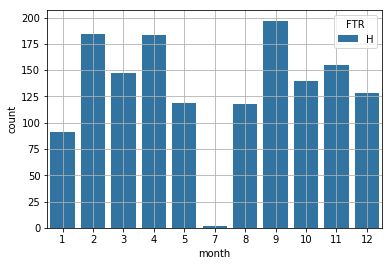

In [57]:
# f, axis = plt.subplots(1, 3)
# Plotting a count plot of graph of winnings for the HOME TEAM only
# Against the month inwhich they won the most.
hometeam_count = dataset[dataset['FTR'] == 'H']
sns.countplot(x='month', hue='FTR', data=hometeam_count)
plt.grid(True)
plt.show() 

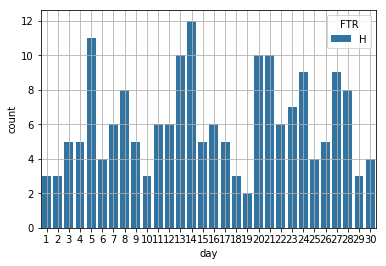

In [58]:
# Plotting a count plot of graph of winnings for the HOME TEAM only
# Against the month inwhich they won the most.
# the month being the 4th month and is filtered off before plotting. 
month_4th_count = hometeam_count[hometeam_count['month'] == 4]
ax = sns.countplot(x='day', hue='FTR', data=month_4th_count)
plt.grid(True)
plt.show() 

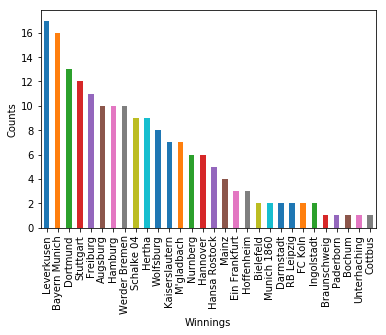

In [59]:
# showing a count plot of home team wining in the month of April (4th month)
# ax = sns.countplot(x='FTR', hue='HomeTeam', data=hometeam_count)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show() 
month_4th_win = month_4th_count['HomeTeam'].value_counts()
month_4th_win.plot(kind='bar')
plt.xlabel('Winnings')
plt.ylabel('Counts')
plt.show() 

In [60]:
# # winnings for the 11th month 
# month11th_win = hometeam_monthcount['HomeTeam'].value_counts() 
# month11th_win.plot(kind='bar')
# plt.xlabel('Winnings')
# plt.ylabel('Counts')
# plt.show() 

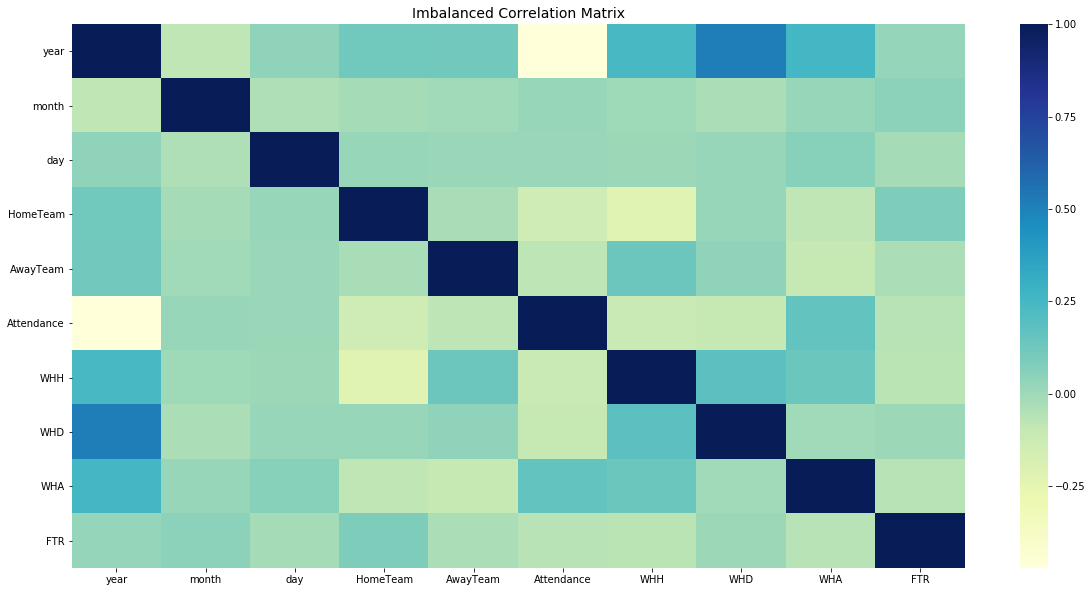

In [61]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [62]:
#### Building A Machine Learning Model To Fit The Data #### 
## 1). Logistic Regression

In [63]:
# Importing the necessary packages needed for Building the model 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

Using TensorFlow backend.


In [64]:
# saving teh dataset into input(x) feature and output feature(y)
X = df.iloc[:, 0:9].values
y = df.iloc[:, 9].values

In [65]:
# Splitting the dataset into train and test set split 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.2, 
                                                   random_state = 50)

In [68]:
df.iloc[:, 0:9].head(3)

,year,month,day,HomeTeam,AwayTeam,Attendance,WHH,WHD,WHA
4047,2013,10,5,28.0,39.0,17.0,10.00,1.29,6.25
589,2002,4,20,15.0,9.0,22500.0,0.00,0.00,0.00
403,2001,10,28,5.0,23.0,40000.0,1.67,3.40,4.33


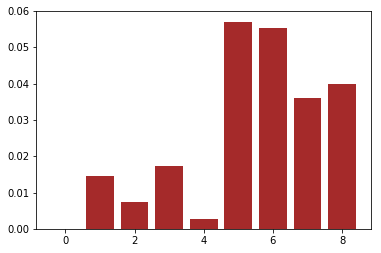

In [66]:
from sklearn.feature_selection import mutual_info_classif 
from sklearn.feature_selection import SelectKBest

# 
ms = SelectKBest(score_func=mutual_info_classif, k='all')
ms.fit(X_train, y_train)
plt.bar([i for i in range(len(ms.scores_))], ms.scores_, color='brown')
plt.show() 

In [215]:
# Displaying the shape of the Training data 
print(X_train.shape)
print(y_train.shape)

(3384, 9)
(3384,)


In [216]:
# Displaying the shape of the test data 
print(X_test.shape)
print(y_test.shape)

(847, 9)
(847,)


In [270]:
# Building The Model using Linear Regression 
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [271]:
# Training the model 
model.score(X_test, y_test)

0.6765053128689492

In [272]:
# # Fitting Polynomial Regression to the dataset
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg = PolynomialFeatures(degree=4)
# X_poly = poly_reg.fit_transform(X)

# model = LogisticRegression()
# model.fit(X_poly, y_train)

In [273]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.65%


In [79]:
# To predict, the inputs must be given 
# [S_year1, S_year2, year, month, day, HomeTeam, AwayTeam]
new_value = [
    13.0, 
    21.0, 1.66, 3.6, 4.5
]

# reshaping the new input data so that the model could predict it 
new_value = np.array(new_value).reshape(1, -1)

# predicting the value for full time results 
model.predict(new_value)

array([1])

In [80]:
df.head(5)

,HomeTeam,AwayTeam,WHH,WHD,WHA,FTR
0,2.0,23.0,1.44,3.6,6.5,1
1,1.0,27.0,1.44,3.6,6.5,1
2,12.0,18.0,2.40,3.2,2.5,1
3,5.0,21.0,1.66,3.3,4.5,3
4,13.0,20.0,1.50,3.6,5.5,2


In [234]:
# Building our deep neural network model 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
from keras.optimizers import SGD

# building the model using keras
# create and fit the LSTM network
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1],
                kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                activation='tanh')
)
model.add(Dense(1, input_dim=50, kernel_initializer='glorot_uniform', 
                bias_initializer='zeros', activation='sigmoid'))

sgd = SGD(
    lr=0.0001, decay=1e-7, momentum=0.9
)

# model.add(Dense(30, input_dim=7, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# Compiling the model 
model.compile(optimizer=sgd,
              loss='mean_squared_error',
              metrics=['accuracy'])

In [1]:
# model.fit(X, y,epochs=50, batch_size=5, verbose=2)